In [32]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Load the dataset and select the columns

In [33]:
df = pd.read_csv("/home/vmh/vmhdocs/Research/Inria/Anl/MetaGenAutoencoder/Data/KO_metaG.norm.txt",sep="\t")
df = df.iloc[:,2-len(df.columns):]
print(df.shape)
df.head(15)

train_data = np.array(df)
print(train_data.shape)
inputlen = len(df.columns)
print(inputlen)

(180, 9024)
(180, 9024)
9024


# Load the model and check the arquitecture

In [34]:

model = keras.models.load_model('./modelcheckpoint')

model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 9024)]            0         
                                                                 
 dense_6 (Dense)             (None, 1180)              10649500  
                                                                 
 batch_normalization_5 (Batc  (None, 1180)             4720      
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 590)               696790    
                                                                 
 batch_normalization_6 (Batc  (None, 590)              2360      
 hNormalization)                                                 
                                                                 
 dense_8 (Dense)             (None, 3)                 1773

# Plot the arquitecture

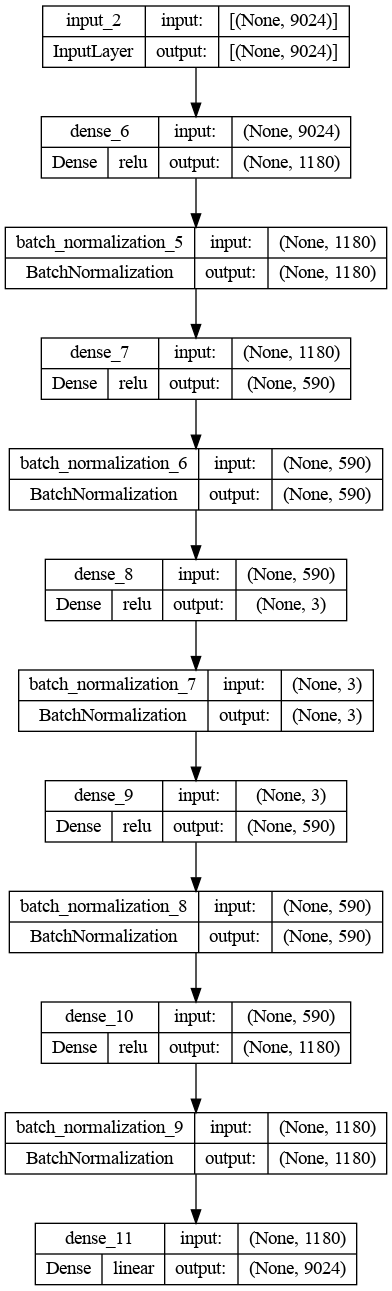

In [35]:
p_model= tf.keras.utils.plot_model(model, show_shapes=True,show_layer_activations=True,to_file='/home/vmh/vmhdocs/Research/Inria/Anl/MotifsDataAutoencoder/Code/model.png')
p_model

# Plot the distance between the true data and the reconstructed version

180


Text(0.5, 1.0, 'Euclidean distance between input and autoencoder output')

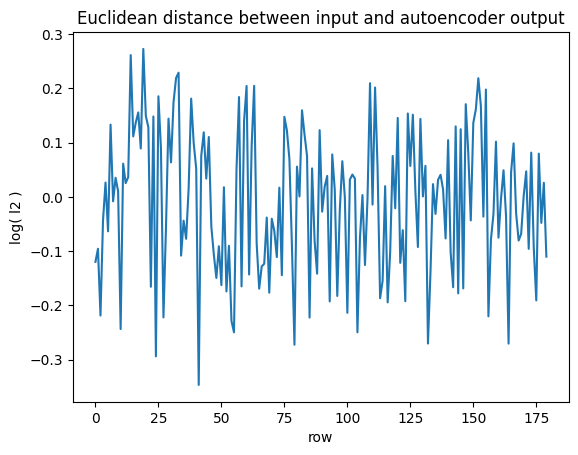

In [36]:
l2_arr = []
inputs = train_data
outputs = model(train_data).numpy()
for i in range(inputs.shape[0]):
    #print(inputs[i])
    #print(outputs[i])
    l2 = np.linalg.norm(outputs[i] - inputs[i])
    l2_arr.append(l2)
print(len(l2_arr))
p = plt.plot(np.log10(l2_arr))
plt.xlabel("row")
plt.ylabel("log( l2 )")
plt.title("Euclidean distance between input and autoencoder output")


    
#plt.savefig("/home/vmh/vmhdocs/Research/Inria/Anl/EnvDataAutoencoder/images/r2.png")

# Plot each datum vs its reconstructed version to check how well the autoencoder is doing pointwise

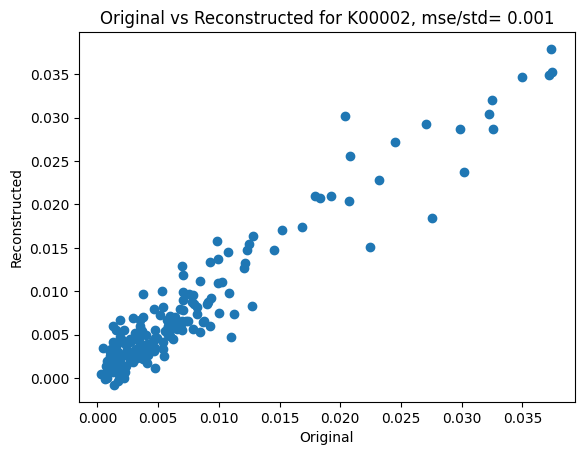

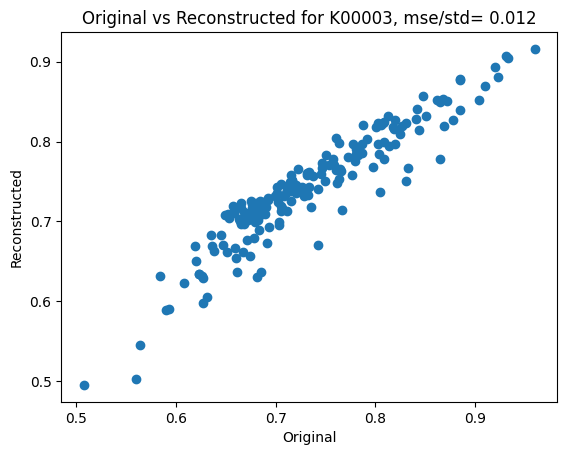

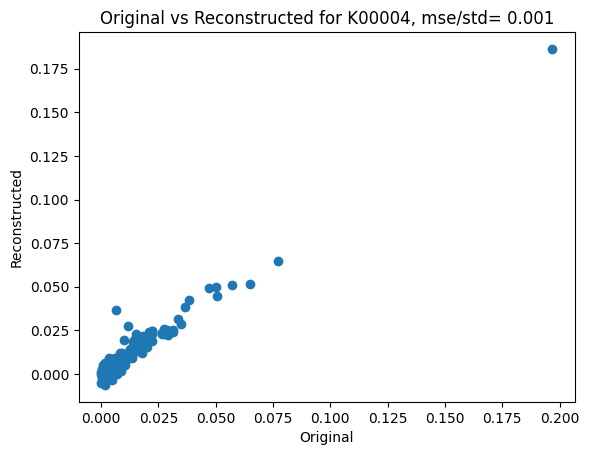

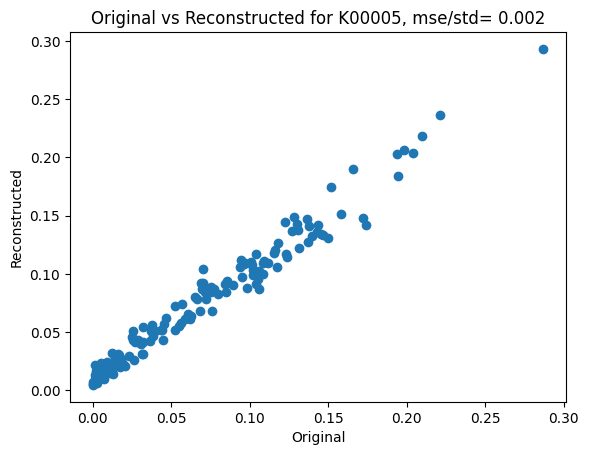

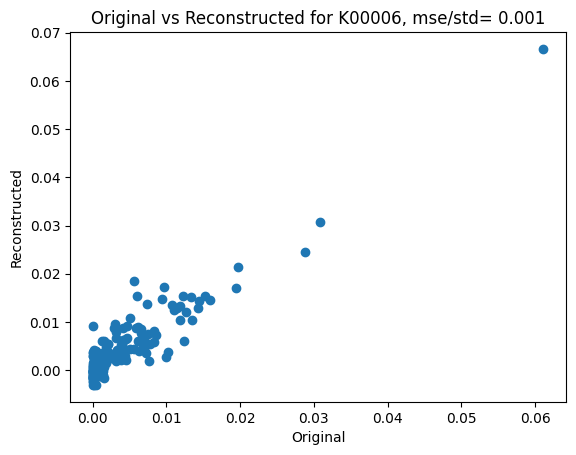

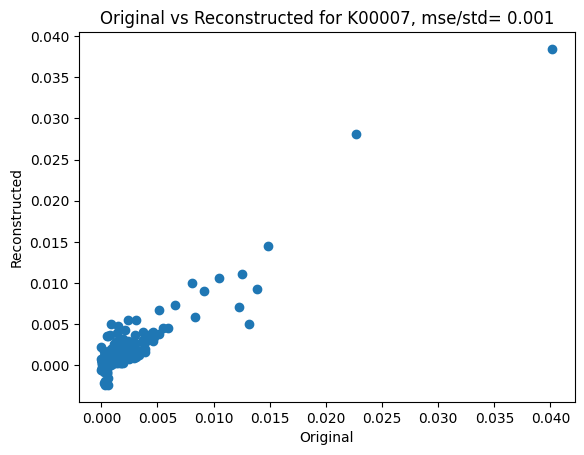

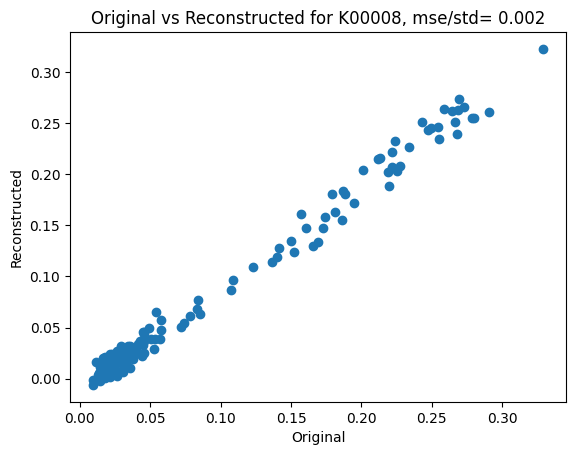

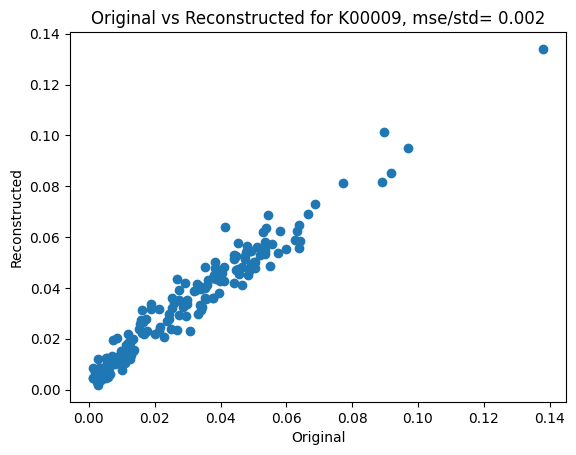

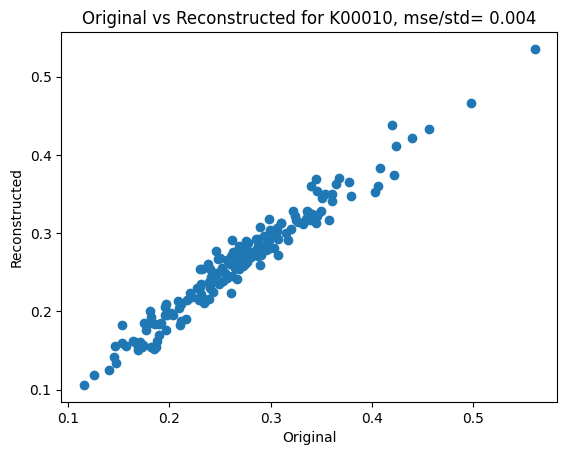

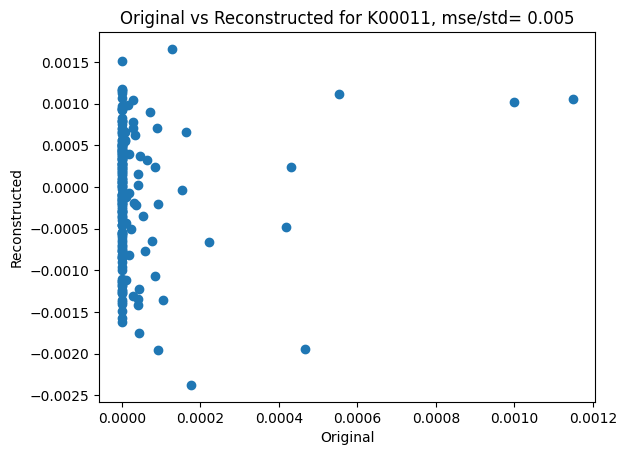

In [37]:
p_arr = []
for j in range(10):
    inp_arr = []
    out_arr = []
    for i in range(inputs.shape[0]):
        inp_arr.append(inputs[i,j])
        out_arr.append(outputs[i,j])
    
    mse = mean_squared_error(out_arr,inp_arr)
    mse_standardized = mse/np.std(inp_arr)
    mse_standardized = round(mse_standardized,3)
    p2 = plt.scatter(inp_arr,out_arr)
    plt.xlabel("Original")
    plt.ylabel("Reconstructed")
    plt.title("Original vs Reconstructed for "+df.columns[j]+", mse/std= "+str(mse_standardized))
    plt.show()
    


In [38]:
def get_encoderlayers(input):
    inputlayer = model.get_layer(index=0)(input)
    encoderl1 = model.get_layer(index=1)(inputlayer)
    encoderl2 = model.get_layer(index=2)(encoderl1)
    return encoderl1, encoderl2

def get_decoderlayers(input):
    inputlayer = model.get_layer(index=0)(input)
    encoderl1 = model.get_layer(index=1)(inputlayer)
    encoderl2 = model.get_layer(index=2)(encoderl1)
    bottleneck = model.get_layer(index=3)(encoderl2)
    decoderl1 = model.get_layer(index=4)(bottleneck)
    decoderl2 = model.get_layer(index=5)(decoderl1)
    return decoderl1, decoderl2



def get_bottleneck(input):
    bottleneck = model.get_layer(index=0)(input)
    bottleneck = model.get_layer(index=1)(bottleneck)
    bottleneck = model.get_layer(index=2)(bottleneck)
    bottleneck = model.get_layer(index=3)(bottleneck)
    bottleneck = model.get_layer(index=4)(bottleneck)
    bottleneck = model.get_layer(index=5)(bottleneck)
    #print(bottleneck)
    return bottleneck

data = train_data[:1]
data.shape
bottleneck = get_bottleneck(data)
encoder_layers = get_encoderlayers(data)
decoder_layers = get_decoderlayers(data)

